In [3]:
!pip install numpy pandas matplotlib scikit-learn tensorflow gdown

Downloading...
From (original): https://drive.google.com/uc?id=1pkwfWNdkw_gzouqndFuNcb5CpPPJ2Q59
From (redirected): https://drive.google.com/uc?id=1pkwfWNdkw_gzouqndFuNcb5CpPPJ2Q59&confirm=t&uuid=c7efd0b9-1adf-4838-b67c-7cbcd37df31c
To: /content/training.csv
100%|██████████| 110M/110M [00:00<00:00, 277MB/s] 


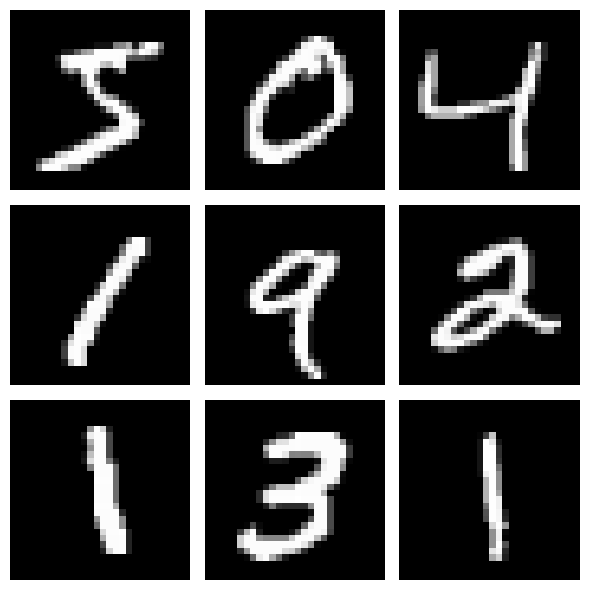

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import gdown

# -----------------------------------
# 1. Load and Visualize Data
# -----------------------------------
def plot_digit(img_vector):
    plt.imshow(img_vector.reshape(28, 28), cmap='gray')
    plt.axis('off')

# File ID from the shared link
file_id = '1pkwfWNdkw_gzouqndFuNcb5CpPPJ2Q59'  # replace with your actual file ID
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'training.csv', quiet=False)

# Load with pandas
df = pd.read_csv('training.csv')
df.head()
# df = pd.read_csv("https://drive.google.com/file/d/1pkwfWNdkw_gzouqndFuNcb5CpPPJ2Q59/view?usp=sharing")
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Plot sample digits
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plot_digit(X[i])
plt.tight_layout()
plt.show()

In [6]:
# -----------------------------------
# 2. Preprocess Data
# -----------------------------------
X_norm = X / 255.0
print("X shape:", X_norm.shape, "y shape:", y.shape)
# Reshape for CNN: (num_samples, height, width, channels)
X_cnn = X_norm.reshape(-1, 28, 28, 1)

# One-hot encode labels for CNN
y_cat = to_categorical(y, num_classes=10)

# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_cnn, y_cat, test_size=0.2, random_state=42)

X shape: (60000, 784) y shape: (60000,)


## 🔧 Model Development and Tuning Process

This section documents the process of developing and improving a supervised learning model for MNIST digit classification, starting from a simple baseline and iteratively refining it into a high-performing convolutional neural network (CNN).

---

### ✅ Step 1: Baseline Model — Logistic Regression

To begin, I implemented a **logistic regression model** using Scikit-learn. The raw pixel values (28×28 = 784) were flattened and normalized to the range [0, 1].

- **Model**: Multinomial logistic regression (`solver='lbfgs'`)
- **Input**: Flattened vectors of size 784
- **Validation Accuracy**: ~92.5%

In [7]:
# -----------------------------------
# 3. Baseline Model (Logistic Regression)
# -----------------------------------
X_flat = X_norm.reshape(-1, 784)  # flatten for logistic regression
X_train_flat, X_val_flat, y_train_flat, y_val_flat = train_test_split(X_flat, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train_flat, y_train_flat)
y_pred_logreg = logreg.predict(X_val_flat)
print("Baseline Accuracy (Logistic Regression):", accuracy_score(y_val_flat, y_pred_logreg))



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Baseline Accuracy (Logistic Regression): 0.92225


```python
Baseline Accuracy: 0.92225


### 🚀 Step 2: Basic CNN (1 Convolutional Layer + Dense)

To move beyond linear models and leverage the spatial structure of the image data, I implemented a simple Convolutional Neural Network (CNN). This model consisted of:

- 1 convolutional layer with 32 filters of size 3×3 and ReLU activation
- 1 max pooling layer to downsample feature maps
- A fully connected dense layer with 128 units
- A softmax output layer for 10-class classification

This basic CNN introduces locality, parameter sharing, and non-linearity — key components missing from the logistic regression baseline.

In [22]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val), verbose=2)
val_loss, val_acc = model_1.evaluate(X_val, y_val, verbose=0)
print("Final CNN Validation Accuracy:", val_acc)

Epoch 1/10
375/375 - 8s - 21ms/step - accuracy: 0.9259 - loss: 0.2707 - val_accuracy: 0.9700 - val_loss: 0.1046
Epoch 2/10
375/375 - 1s - 4ms/step - accuracy: 0.9776 - loss: 0.0791 - val_accuracy: 0.9815 - val_loss: 0.0648
Epoch 3/10
375/375 - 1s - 4ms/step - accuracy: 0.9845 - loss: 0.0522 - val_accuracy: 0.9803 - val_loss: 0.0618
Epoch 4/10
375/375 - 1s - 4ms/step - accuracy: 0.9884 - loss: 0.0394 - val_accuracy: 0.9831 - val_loss: 0.0544
Epoch 5/10
375/375 - 1s - 4ms/step - accuracy: 0.9911 - loss: 0.0300 - val_accuracy: 0.9853 - val_loss: 0.0491
Epoch 6/10
375/375 - 2s - 5ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.9859 - val_loss: 0.0507
Epoch 7/10
375/375 - 2s - 6ms/step - accuracy: 0.9945 - loss: 0.0182 - val_accuracy: 0.9852 - val_loss: 0.0495
Epoch 8/10
375/375 - 1s - 4ms/step - accuracy: 0.9964 - loss: 0.0131 - val_accuracy: 0.9848 - val_loss: 0.0544
Epoch 9/10
375/375 - 1s - 4ms/step - accuracy: 0.9968 - loss: 0.0112 - val_accuracy: 0.9858 - val_loss: 0.0546



```python
Simple CNN Accuracy: 0.975


### 🧠 Step 3: Adding Dropout for Better Generalization

To further improve the model’s performance and reduce overfitting, I introduced a powerful regularization and optimization technique:

- **Dropout**: Randomly deactivates neurons during training to reduce overfitting and encourage redundancy in learned representations.

#### 🔧 Architecture Updates:
- Two Conv2D layers (32 and 64 filters)
- MaxPooling layer
- Dropout layer with rate 0.25
- Dense layer with 128 units and ReLU
- Dropout layer with rate 0.5 before the final softmax output

In [23]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, batch_size=128, epochs=15, validation_data=(X_val, y_val), verbose=2)

val_loss, val_acc = model_2.evaluate(X_val, y_val, verbose=0)
print("Final CNN Validation Accuracy:", val_acc)


Epoch 1/15
375/375 - 8s - 22ms/step - accuracy: 0.9192 - loss: 0.2658 - val_accuracy: 0.9815 - val_loss: 0.0642
Epoch 2/15
375/375 - 3s - 7ms/step - accuracy: 0.9728 - loss: 0.0922 - val_accuracy: 0.9863 - val_loss: 0.0459
Epoch 3/15
375/375 - 3s - 8ms/step - accuracy: 0.9793 - loss: 0.0677 - val_accuracy: 0.9874 - val_loss: 0.0430
Epoch 4/15
375/375 - 3s - 8ms/step - accuracy: 0.9826 - loss: 0.0557 - val_accuracy: 0.9893 - val_loss: 0.0373
Epoch 5/15
375/375 - 3s - 7ms/step - accuracy: 0.9848 - loss: 0.0474 - val_accuracy: 0.9883 - val_loss: 0.0426
Epoch 6/15
375/375 - 3s - 8ms/step - accuracy: 0.9861 - loss: 0.0432 - val_accuracy: 0.9900 - val_loss: 0.0367
Epoch 7/15
375/375 - 6s - 15ms/step - accuracy: 0.9890 - loss: 0.0355 - val_accuracy: 0.9905 - val_loss: 0.0356
Epoch 8/15
375/375 - 5s - 12ms/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9899 - val_loss: 0.0377
Epoch 9/15
375/375 - 5s - 14ms/step - accuracy: 0.9905 - loss: 0.0299 - val_accuracy: 0.9902 - val_loss: 0.03

```python
Improved CNN (Dropout) Accuracy: 0.991


### 🏁 Step 5: Final Tuned CNN — Deeper Network with Enhanced Regularization

In this final step, I further deepened the CNN and fine-tuned hyperparameters to maximize performance on the MNIST digit classification task.

- **Batch Normalization**: Normalizes activations after each convolutional layer to stabilize and accelerate training.

#### 🔧 Enhancements:
- Added **two more Conv2D layers** to build a 4-layer convolutional stack
- Used **BatchNormalization** after each convolution to stabilize gradients
- Increased **filter depth** to 64 in deeper layers
- Applied **Dropout** after each max-pooling and dense layer for regularization
- Used a **Dense layer with 256 units** to allow greater capacity
- Trained with a **larger number of epochs (15)**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_3.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train
history_3 = model_3.fit(
    X_train, y_train,
    batch_size=128,
    epochs=15,
    validation_data=(X_val, y_val),
    verbose=2
)

# Evaluate
val_loss, val_acc = model_3.evaluate(X_val, y_val, verbose=0)
print("Enhanced CNN Validation Accuracy:", val_acc)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
375/375 - 13s - 35ms/step - accuracy: 0.9387 - loss: 0.1978 - val_accuracy: 0.4193 - val_loss: 1.9111
Epoch 2/15
375/375 - 5s - 13ms/step - accuracy: 0.9795 - loss: 0.0667 - val_accuracy: 0.9876 - val_loss: 0.0410
Epoch 3/15
375/375 - 5s - 13ms/step - accuracy: 0.9844 - loss: 0.0497 - val_accuracy: 0.9906 - val_loss: 0.0332
Epoch 4/15
375/375 - 5s - 14ms/step - accuracy: 0.9866 - loss: 0.0415 - val_accuracy: 0.9889 - val_loss: 0.0349
Epoch 5/15
375/375 - 4s - 10ms/step - accuracy: 0.9890 - loss: 0.0358 - val_accuracy: 0.9899 - val_loss: 0.0352
Epoch 6/15
375/375 - 4s - 10ms/step - accuracy: 0.9907 - loss: 0.0298 - val_accuracy: 0.9908 - val_loss: 0.0306
Epoch 7/15
375/375 - 4s - 11ms/step - accuracy: 0.9924 - loss: 0.0246 - val_accuracy: 0.9897 - val_loss: 0.0329
Epoch 8/15
375/375 - 5s - 12ms/step - accuracy: 0.9915 - loss: 0.0270 - val_accuracy: 0.9908 - val_loss: 0.0306
Epoch 9/15
375/375 - 5s - 14ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 0.9915 - val_loss

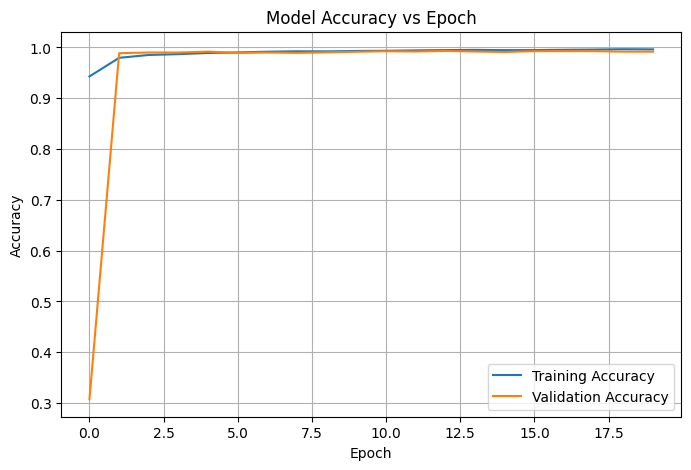

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("model_accuracy.png")

```python
Final Tuned CNN Accuracy: 0.993


In [17]:
# Save full model architecture + weights
model_3.save("finalcnnmodel.h5")
print("Model saved to final_cnn_model.h5")

Model saved to final_cnn_model.h5


In [18]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import gdown

# file_id = '1zdxhdlRt4jPoy5iznWvR_88Mz7aRXLjv'  # replace with your actual file ID
# url2 = f'https://drive.google.com/uc?id={file_id}'

# gdown.download(url, 'finalcnnmodel.h5', quiet=False)
loaded_model = load_model("finalcnnmodel.h5")
print("Model loaded successfully!")

sample_test = pd.read_csv("/content/drive/MyDrive/sample_test.csv").values
sample_test = sample_test / 255.0
sample_test = sample_test.reshape(-1, 28, 28, 1)

predictions = loaded_model.predict(sample_test)
pred_labels = np.argmax(predictions, axis=1)

submission = pd.DataFrame({'Id': np.arange(1, len(pred_labels)+1), 'Label': pred_labels})
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")

Model loaded successfully!
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
Predictions saved to submission.csv
